<a href="https://www.kaggle.com/code/avtnshm/texas-government-salaries?scriptVersionId=146541308" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### Problem Statement

- Create a predictive model which will help theTexas state government
team to know the payroll information of employees of the state of Texas.
- 
 Who are the outliers in the salaries?
 What departments/roles have the biggest wage disparities between
managers and employees?
 Have salaries and total compensations for some roles/ departments/
head-count changed over time?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv('texas_salaries.csv')
df.head()

,AGY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,510,TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL ...,SPINKS,DARREL,D,1623,DIRECTOR IV ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,10000.00,120000.00,147334,True,NaN,NaN,171383.40,NaN
3,520,BOARD OF EXAMINERS OF PSYCHOLOGISTS ...,SPINKS,DARREL,D,E178,"EXEC DIR, BD OF EXAMS OF PSYCHOLOGISTS ...",WHITE,MALE,ERP - EXEMPT REGULAR PART-TIME,...,49.40717,20.0,4281.95,51383.40,147334,True,NaN,NaN,NaN,True
4,537,DEPARTMENT OF STATE HEALTH SERVICES ...,ADAMS III,LEE,A,1323,INSPECTOR III ...,BLACK,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,3447.25,41367.00,129635,True,1.0,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 148072 entries, 0 to 148071

Data columns (total 21 columns):

 #   Column                   Non-Null Count   Dtype  

---  ------                   --------------   -----  

 0   AGY                      148072 non-null  int64  

 1   AGENCY NAME              148072 non-null  object 

 2   LAST NAME                148072 non-null  object 

 3   FIRST NAME               148072 non-null  object 

 4   MI                       148072 non-null  object 

 5   CLASS CODE               148072 non-null  object 

 6   CLASS TITLE              148072 non-null  object 

 7   ETHNICITY                148072 non-null  object 

 8   GENDER                   148072 non-null  object 

 9   STATUS                   148072 non-null  object 

 10  EMPLOY DATE              148072 non-null  object 

 11  HRLY RATE                148072 non-null  float64

 12  HRS PER WK               148072 non-null  float64

 13  MONTHLY                  148072 non-null 

In [4]:
#renaming the column name for standardisation
df= df.rename(columns={'AGENCY NAME':'AGENCY_NAME','CLASS CODE' :'CLASS_CODE','CLASS TITLE':'CLASS_TITLE' , 'EMPLOY DATE':'EMPLOY_DATE', 'HRLY RATE':'HRLY_RATE','HRS PER WK':'HRS_PER_WK'})
df.head(0)

,AGY,AGENCY_NAME,LAST NAME,FIRST NAME,MI,CLASS_CODE,CLASS_TITLE,ETHNICITY,GENDER,STATUS,...,HRLY_RATE,HRS_PER_WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search


In [5]:
df.describe(include='all')

,AGY,AGENCY_NAME,LAST NAME,FIRST NAME,MI,CLASS_CODE,CLASS_TITLE,ETHNICITY,GENDER,STATUS,...,HRLY_RATE,HRS_PER_WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
count,148072.000000,148072,148072,148072,148072,148072,148072,148072,148072,148072,...,148072.000000,148072.000000,148072.000000,148072.000000,1.480720e+05,131,7.0,94,15.000000,15
unique,NaN,113,38237,23177,28,1477,1419,6,2,11,...,NaN,NaN,NaN,NaN,NaN,1,NaN,1,NaN,1
top,NaN,HEALTH AND HUMAN SERVICES COMMISSION ...,SMITH,MICHAEL,,4504,CORREC OFFICER IV ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,NaN,NaN,NaN,NaN,NaN,True,NaN,True,NaN,True
freq,NaN,36572,1235,1824,37201,9132,9132,66712,84818,141791,...,NaN,NaN,NaN,NaN,NaN,131,NaN,94,NaN,15
mean,546.026494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.271402,39.676976,4204.888652,50458.663830,5.466680e+05,NaN,1.0,NaN,70030.024000,NaN
std,139.280835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.061998,2.466791,2075.605861,24907.270334,4.710162e+05,NaN,0.0,NaN,50550.241183,NaN
min,101.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,1.000000,86.660000,1039.920000,1.000000e+00,NaN,1.0,NaN,18000.000000,NaN
25%,529.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,40.000000,3019.840000,36238.080000,1.102605e+05,NaN,1.0,NaN,32139.420000,NaN
50%,530.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,40.000000,3720.170000,44642.040000,3.411880e+05,NaN,1.0,NaN,49682.160000,NaN
75%,696.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,40.000000,4838.090000,58057.080000,1.075972e+06,NaN,1.0,NaN,105600.000000,NaN


In [6]:
df['EMPLOY_DATE'].info()

<class 'pandas.core.series.Series'>

RangeIndex: 148072 entries, 0 to 148071

Series name: EMPLOY_DATE

Non-Null Count   Dtype 

--------------   ----- 

148072 non-null  object

dtypes: object(1)

memory usage: 1.1+ MB


In [7]:
df.isnull().sum()

AGY                             0
AGENCY_NAME                     0
LAST NAME                       0
FIRST NAME                      0
MI                              0
CLASS_CODE                      0
CLASS_TITLE                     0
ETHNICITY                       0
GENDER                          0
STATUS                          0
EMPLOY_DATE                     0
HRLY_RATE                       0
HRS_PER_WK                      0
MONTHLY                         0
ANNUAL                          0
STATE NUMBER                    0
duplicated                 147941
multiple_full_time_jobs    148065
combined_multiple_jobs     147978
summed_annual_salary       148057
hide_from_search           148057
dtype: int64

In [8]:
df.skew()

AGY                        -0.608895
HRLY_RATE                  17.375814
HRS_PER_WK                 -8.103082
MONTHLY                     2.667790
ANNUAL                      2.667790
STATE NUMBER                0.294206
duplicated                  0.000000
multiple_full_time_jobs     0.000000
combined_multiple_jobs      0.000000
summed_annual_salary        0.901684
hide_from_search            0.000000
dtype: float64

##### skewness is quite high for  HRLY_RATE, HRS_PER_WK, and not normal for MONTHLY  and ANNUAL columns

In [9]:
df.describe()

,AGY,HRLY_RATE,HRS_PER_WK,MONTHLY,ANNUAL,STATE NUMBER,multiple_full_time_jobs,summed_annual_salary
count,148072.000000,148072.000000,148072.000000,148072.000000,148072.000000,1.480720e+05,7.0,15.000000
mean,546.026494,0.271402,39.676976,4204.888652,50458.663830,5.466680e+05,1.0,70030.024000
std,139.280835,4.061998,2.466791,2075.605861,24907.270334,4.710162e+05,0.0,50550.241183
min,101.000000,0.000000,1.000000,86.660000,1039.920000,1.000000e+00,1.0,18000.000000
25%,529.000000,0.000000,40.000000,3019.840000,36238.080000,1.102605e+05,1.0,32139.420000
50%,530.000000,0.000000,40.000000,3720.170000,44642.040000,3.411880e+05,1.0,49682.160000
75%,696.000000,0.000000,40.000000,4838.090000,58057.080000,1.075972e+06,1.0,105600.000000
max,930.000000,100.493280,42.000000,46125.000000,553500.000000,1.258395e+06,1.0,171383.400000


In [10]:
continous=['HRLY_RATE', 'HRS_PER_WK', 'MONTHLY', 'ANNUAL', 'summed_annual_salary']

In [11]:
c = df[['HRLY_RATE', 'HRS_PER_WK', 'MONTHLY', 'ANNUAL', 'summed_annual_salary']].corr()
c

,HRLY_RATE,HRS_PER_WK,MONTHLY,ANNUAL,summed_annual_salary
HRLY_RATE,1.000000,-0.342122,0.102149,0.102149,0.283559
HRS_PER_WK,-0.342122,1.000000,0.109039,0.109039,0.328435
MONTHLY,0.102149,0.109039,1.000000,1.000000,0.973179
ANNUAL,0.102149,0.109039,1.000000,1.000000,0.973179
summed_annual_salary,0.283559,0.328435,0.973179,0.973179,1.000000


#### Correlation between  Montly and Annual is 1, while that between summed_annual_salary and monthly and annual is 0.97, so we can drop some of these columns, 

In [12]:
df.drop(columns=['ANNUAL', 'summed_annual_salary'], inplace=True)
df

,AGY,AGENCY_NAME,LAST NAME,FIRST NAME,MI,CLASS_CODE,CLASS_TITLE,ETHNICITY,GENDER,STATUS,EMPLOY_DATE,HRLY_RATE,HRS_PER_WK,MONTHLY,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,127717,True,NaN,NaN,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.77,127717,True,NaN,NaN,True
2,510,TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL ...,SPINKS,DARREL,D,1623,DIRECTOR IV ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,03/01/20,0.00000,40.0,10000.00,147334,True,NaN,NaN,NaN
3,520,BOARD OF EXAMINERS OF PSYCHOLOGISTS ...,SPINKS,DARREL,D,E178,"EXEC DIR, BD OF EXAMS OF PSYCHOLOGISTS ...",WHITE,MALE,ERP - EXEMPT REGULAR PART-TIME,03/04/20,49.40717,20.0,4281.95,147334,True,NaN,NaN,True
4,537,DEPARTMENT OF STATE HEALTH SERVICES ...,ADAMS III,LEE,A,1323,INSPECTOR III ...,BLACK,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/01/19,0.00000,40.0,3447.25,129635,True,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148067,809,STATE PRESERVATION BOARD ...,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,10/30/17,0.00000,40.0,2899.00,770781,NaN,NaN,NaN,NaN
148068,809,STATE PRESERVATION BOARD ...,WINDHAM,EVAN,A,0302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,07/13/15,0.00000,40.0,5500.00,847431,NaN,NaN,NaN,NaN
148069,809,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,10/15/12,12.93000,20.0,1120.60,34266,NaN,NaN,NaN,NaN
148070,809,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/22/89,0.00000,40.0,5744.16,123490,NaN,NaN,NaN,NaN


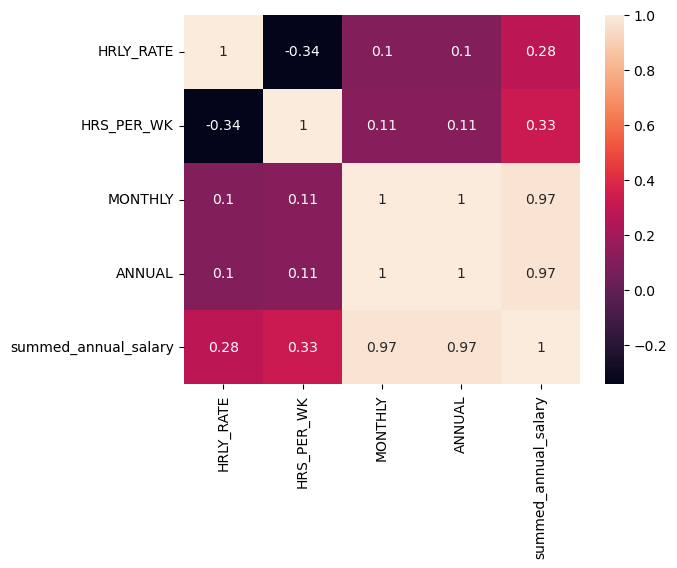

In [13]:
sns.heatmap(c, annot=True)
plt.show()

In [14]:
df.drop(columns=['duplicated',  'multiple_full_time_jobs', 'combined_multiple_jobs', 'hide_from_search'], inplace=True)
df

,AGY,AGENCY_NAME,LAST NAME,FIRST NAME,MI,CLASS_CODE,CLASS_TITLE,ETHNICITY,GENDER,STATUS,EMPLOY_DATE,HRLY_RATE,HRS_PER_WK,MONTHLY,STATE NUMBER
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,127717
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.77,127717
2,510,TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL ...,SPINKS,DARREL,D,1623,DIRECTOR IV ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,03/01/20,0.00000,40.0,10000.00,147334
3,520,BOARD OF EXAMINERS OF PSYCHOLOGISTS ...,SPINKS,DARREL,D,E178,"EXEC DIR, BD OF EXAMS OF PSYCHOLOGISTS ...",WHITE,MALE,ERP - EXEMPT REGULAR PART-TIME,03/04/20,49.40717,20.0,4281.95,147334
4,537,DEPARTMENT OF STATE HEALTH SERVICES ...,ADAMS III,LEE,A,1323,INSPECTOR III ...,BLACK,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/01/19,0.00000,40.0,3447.25,129635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148067,809,STATE PRESERVATION BOARD ...,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,10/30/17,0.00000,40.0,2899.00,770781
148068,809,STATE PRESERVATION BOARD ...,WINDHAM,EVAN,A,0302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,07/13/15,0.00000,40.0,5500.00,847431
148069,809,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,10/15/12,12.93000,20.0,1120.60,34266
148070,809,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/22/89,0.00000,40.0,5744.16,123490


### Outliers

In [15]:
df['MONTHLY'].describe()

count    148072.000000
mean       4204.888652
std        2075.605861
min          86.660000
25%        3019.840000
50%        3720.170000
75%        4838.090000
max       46125.000000
Name: MONTHLY, dtype: float64

In [16]:
Outlier_in_salaries = df[(df['MONTHLY']>4838) | (df['MONTHLY']<3019)]['CLASS_TITLE'].unique()
(Outlier_in_salaries.tolist())

['JUDGE, RETIRED                                    ',
 'GENERAL COUNSEL IV                                ',
 'DIRECTOR IV                                       ',
 'INSPECTOR II                                      ',
 'PROGRAM SPECIALIST VI                             ',
 'RESIDENT SPECIALIST III                           ',
 'RESIDENT SPECIALIST II                            ',
 'SECURITY OFFICER II                               ',
 'VEHICLE DRIVER III                                ',
 'LIBRARY ASST III                                  ',
 'ADMINISTRATIVE ASST III                           ',
 'ADMINISTRATIVE ASST II                            ',
 'NURSE II                                          ',
 'HOURLY/SUBSTITUTES                                ',
 'RESIDENT SPECIALIST I                             ',
 'SUBSTITUTE WORKERS                                ',
 'LEGISLATIVE PROFESSIONAL                          ',
 'LEG. OFFICIAL/ADMINISTRATOR                       ',
 'LEG. SER

### Wage Disparities

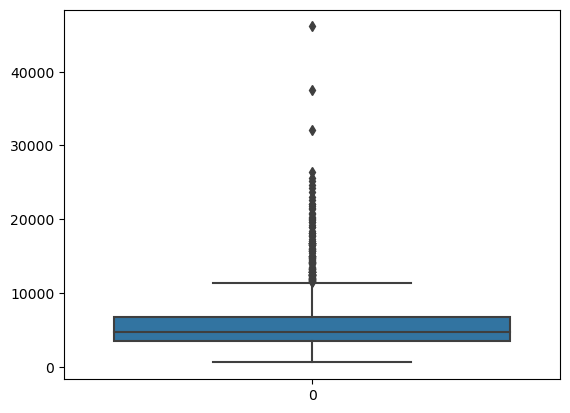

In [17]:
sns.boxplot(df.groupby('CLASS_TITLE')['MONTHLY'].median())
plt.show()

In [18]:
df.pivot_table(values = ['MONTHLY'], index = ['CLASS_TITLE','STATUS'], aggfunc = 'median')

,,MONTHLY
CLASS_TITLE,STATUS,
14 CUSTOMER SERVICES REP,URF - UNCLASSIFIED REGULAR FULL-TIME,3334.000
19 EXECUTIVE ASSISTANT,URF - UNCLASSIFIED REGULAR FULL-TIME,5416.080
20 PROGRAM SPECIALIST III,URF - UNCLASSIFIED REGULAR FULL-TIME,4929.085
21 BUSINESS ANALYST,URF - UNCLASSIFIED REGULAR FULL-TIME,5534.560
21 PROGRAM SPECIALIST IV,URF - UNCLASSIFIED REGULAR FULL-TIME,5158.650
...,...,...
WRITING SPEC I,URF - UNCLASSIFIED REGULAR FULL-TIME,3270.830
WRITING SPEC II,URF - UNCLASSIFIED REGULAR FULL-TIME,3583.330
WRITING SPECIALIST III,URF - UNCLASSIFIED REGULAR FULL-TIME,3966.930


### Change in compensation over time

In [19]:
df["year_of_employment"] = pd.DatetimeIndex(df['EMPLOY_DATE']).year
df['years_of_service'] = 2020- df['year_of_employment']  #as the data was last updated on (20.5.2020)
 

In [20]:
df['years_of_service'] = df['years_of_service'].clip(lower=0)

In [21]:
pd.DatetimeIndex(df['EMPLOY_DATE']).year.min()

1973

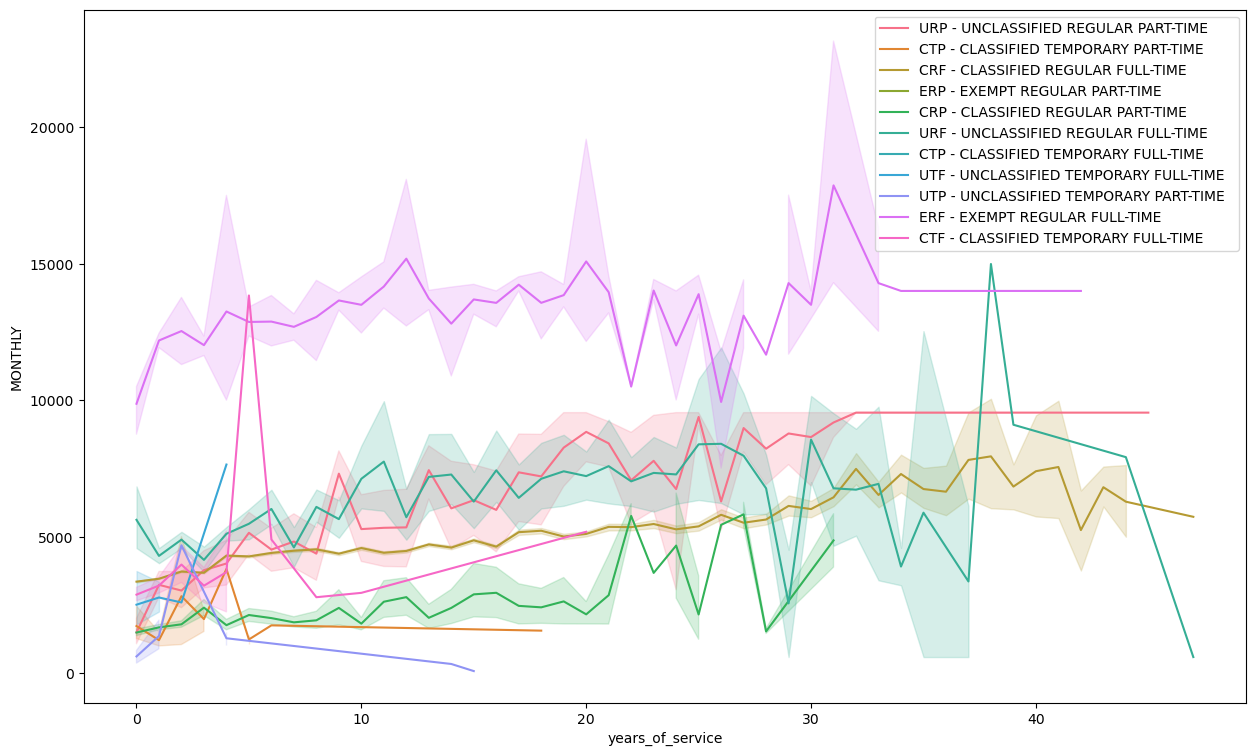

In [22]:
plt.figure(figsize=(15,9))
sns.lineplot(x='years_of_service', y='MONTHLY',hue ='STATUS', data= df)
plt.legend()
plt.show()

In [23]:
df.pivot_table(values = ['MONTHLY', 'years_of_service'], index = ['CLASS_TITLE','STATUS'], aggfunc = 'mean')

,,MONTHLY,years_of_service
CLASS_TITLE,STATUS,,
14 CUSTOMER SERVICES REP,URF - UNCLASSIFIED REGULAR FULL-TIME,3366.931429,1.857143
19 EXECUTIVE ASSISTANT,URF - UNCLASSIFIED REGULAR FULL-TIME,5416.080000,3.500000
20 PROGRAM SPECIALIST III,URF - UNCLASSIFIED REGULAR FULL-TIME,4932.235000,11.166667
21 BUSINESS ANALYST,URF - UNCLASSIFIED REGULAR FULL-TIME,5368.566667,16.333333
21 PROGRAM SPECIALIST IV,URF - UNCLASSIFIED REGULAR FULL-TIME,5158.650000,2.000000
...,...,...,...
WRITING SPEC I,URF - UNCLASSIFIED REGULAR FULL-TIME,3270.830000,2.500000
WRITING SPEC II,URF - UNCLASSIFIED REGULAR FULL-TIME,3583.330000,6.000000
WRITING SPECIALIST III,URF - UNCLASSIFIED REGULAR FULL-TIME,4120.993333,13.333333


### Predicting models for salaries

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in range(0,df.shape[1]):
    if df.dtypes[i]=='object':
        df[df.columns[i]] = le.fit_transform(df[df.columns[i]])
        
        
df

,AGY,AGENCY_NAME,LAST NAME,FIRST NAME,MI,CLASS_CODE,CLASS_TITLE,ETHNICITY,GENDER,STATUS,EMPLOY_DATE,HRLY_RATE,HRS_PER_WK,MONTHLY,STATE NUMBER,year_of_employment,years_of_service
0,241,17,30132,15032,23,1405,711,5,1,8,953,75.96150,29.0,9545.82,127717,1988,32
1,212,48,30132,15032,23,616,561,5,1,4,609,81.04454,4.0,1404.77,127717,2015,5
2,510,82,32891,4845,5,298,398,5,1,0,1124,0.00000,40.0,10000.00,147334,2020,0
3,520,4,32891,4845,5,1378,487,5,1,6,1189,49.40717,20.0,4281.95,147334,2020,0
4,537,29,248,12608,2,249,673,2,1,0,4219,0.00000,40.0,3447.25,129635,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148067,809,76,36934,9901,17,1044,1195,5,1,0,5268,0.00000,40.0,2899.00,770781,2017,3
148068,809,76,37358,6935,2,83,1401,5,0,0,3392,0.00000,40.0,5500.00,847431,2015,5
148069,809,76,37643,5489,4,4,324,5,1,1,5019,12.93000,20.0,1120.60,34266,2012,8
148070,809,76,37885,6001,19,277,1005,5,1,0,4631,0.00000,40.0,5744.16,123490,1989,31


In [26]:
X= df.drop(['AGY','AGENCY_NAME','LAST NAME' ,'FIRST NAME','MI','EMPLOY_DATE','STATE NUMBER','year_of_employment', 'MONTHLY'], axis=1)
y=df['MONTHLY']
print(X)
print(y)

        CLASS_CODE  CLASS_TITLE  ETHNICITY  GENDER  STATUS  HRLY_RATE  \

0             1405          711          5       1       8   75.96150   

1              616          561          5       1       4   81.04454   

2              298          398          5       1       0    0.00000   

3             1378          487          5       1       6   49.40717   

4              249          673          2       1       0    0.00000   

...            ...          ...        ...     ...     ...        ...   

148067        1044         1195          5       1       0    0.00000   

148068          83         1401          5       0       0    0.00000   

148069           4          324          5       1       1   12.93000   

148070         277         1005          5       1       0    0.00000   

148071           4          324          5       0       1   11.74000   



        HRS_PER_WK  years_of_service  

0             29.0                32  

1              4.0            

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=7)

In [28]:
def fitAndPredict(model):
    """The following code makes faster to evaluate a model 
    automating the fit and accuracy process"""
    
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    from sklearn.model_selection import cross_val_score
    scores = cross_val_score(model, X, y, cv=5)
    print("Train R2 :", model.score(X_train, y_train))
    print("Test R2: ", model.score(X_test, y_test))
    print("Cross Validation Score: ", scores.mean())
    return 'model ran succesfully!'

In [29]:
model1 = LinearRegression()
model2 = Lasso()
model3 = Ridge()
model4 = XGBRegressor()
models = [model1,model2, model3, model4]
i = 0
for model in models:
    i +=1
    print("Model ", i,":", model)
    print(fitAndPredict(model))

Model  1 : LinearRegression()

Train R2 : 0.1955327866708394

Test R2:  0.19865779523650662

Cross Validation Score:  -0.060389995318263945

model ran succesfully!

Model  2 : Lasso()

Train R2 : 0.19553147277145688

Test R2:  0.19864433947388793

Cross Validation Score:  -0.05956450706061382

model ran succesfully!

Model  3 : Ridge()

Train R2 : 0.19553278665504348

Test R2:  0.19865775200297053

Cross Validation Score:  -0.06038526161663118

model ran succesfully!

Model  4 : XGBRegressor(base_score=None, booster=None, callbacks=None,

             colsample_bylevel=None, colsample_bynode=None,

             colsample_bytree=None, device=None, early_stopping_rounds=None,

             enable_categorical=False, eval_metric=None, feature_types=None,

             gamma=None, grow_policy=None, importance_type=None,

             interaction_constraints=None, learning_rate=None, max_bin=None,

             max_cat_threshold=None, max_cat_to_onehot=None,

             max_delta_step=None